# Stall

Data exported to ./output/stall_speeds_compliance.xlsx


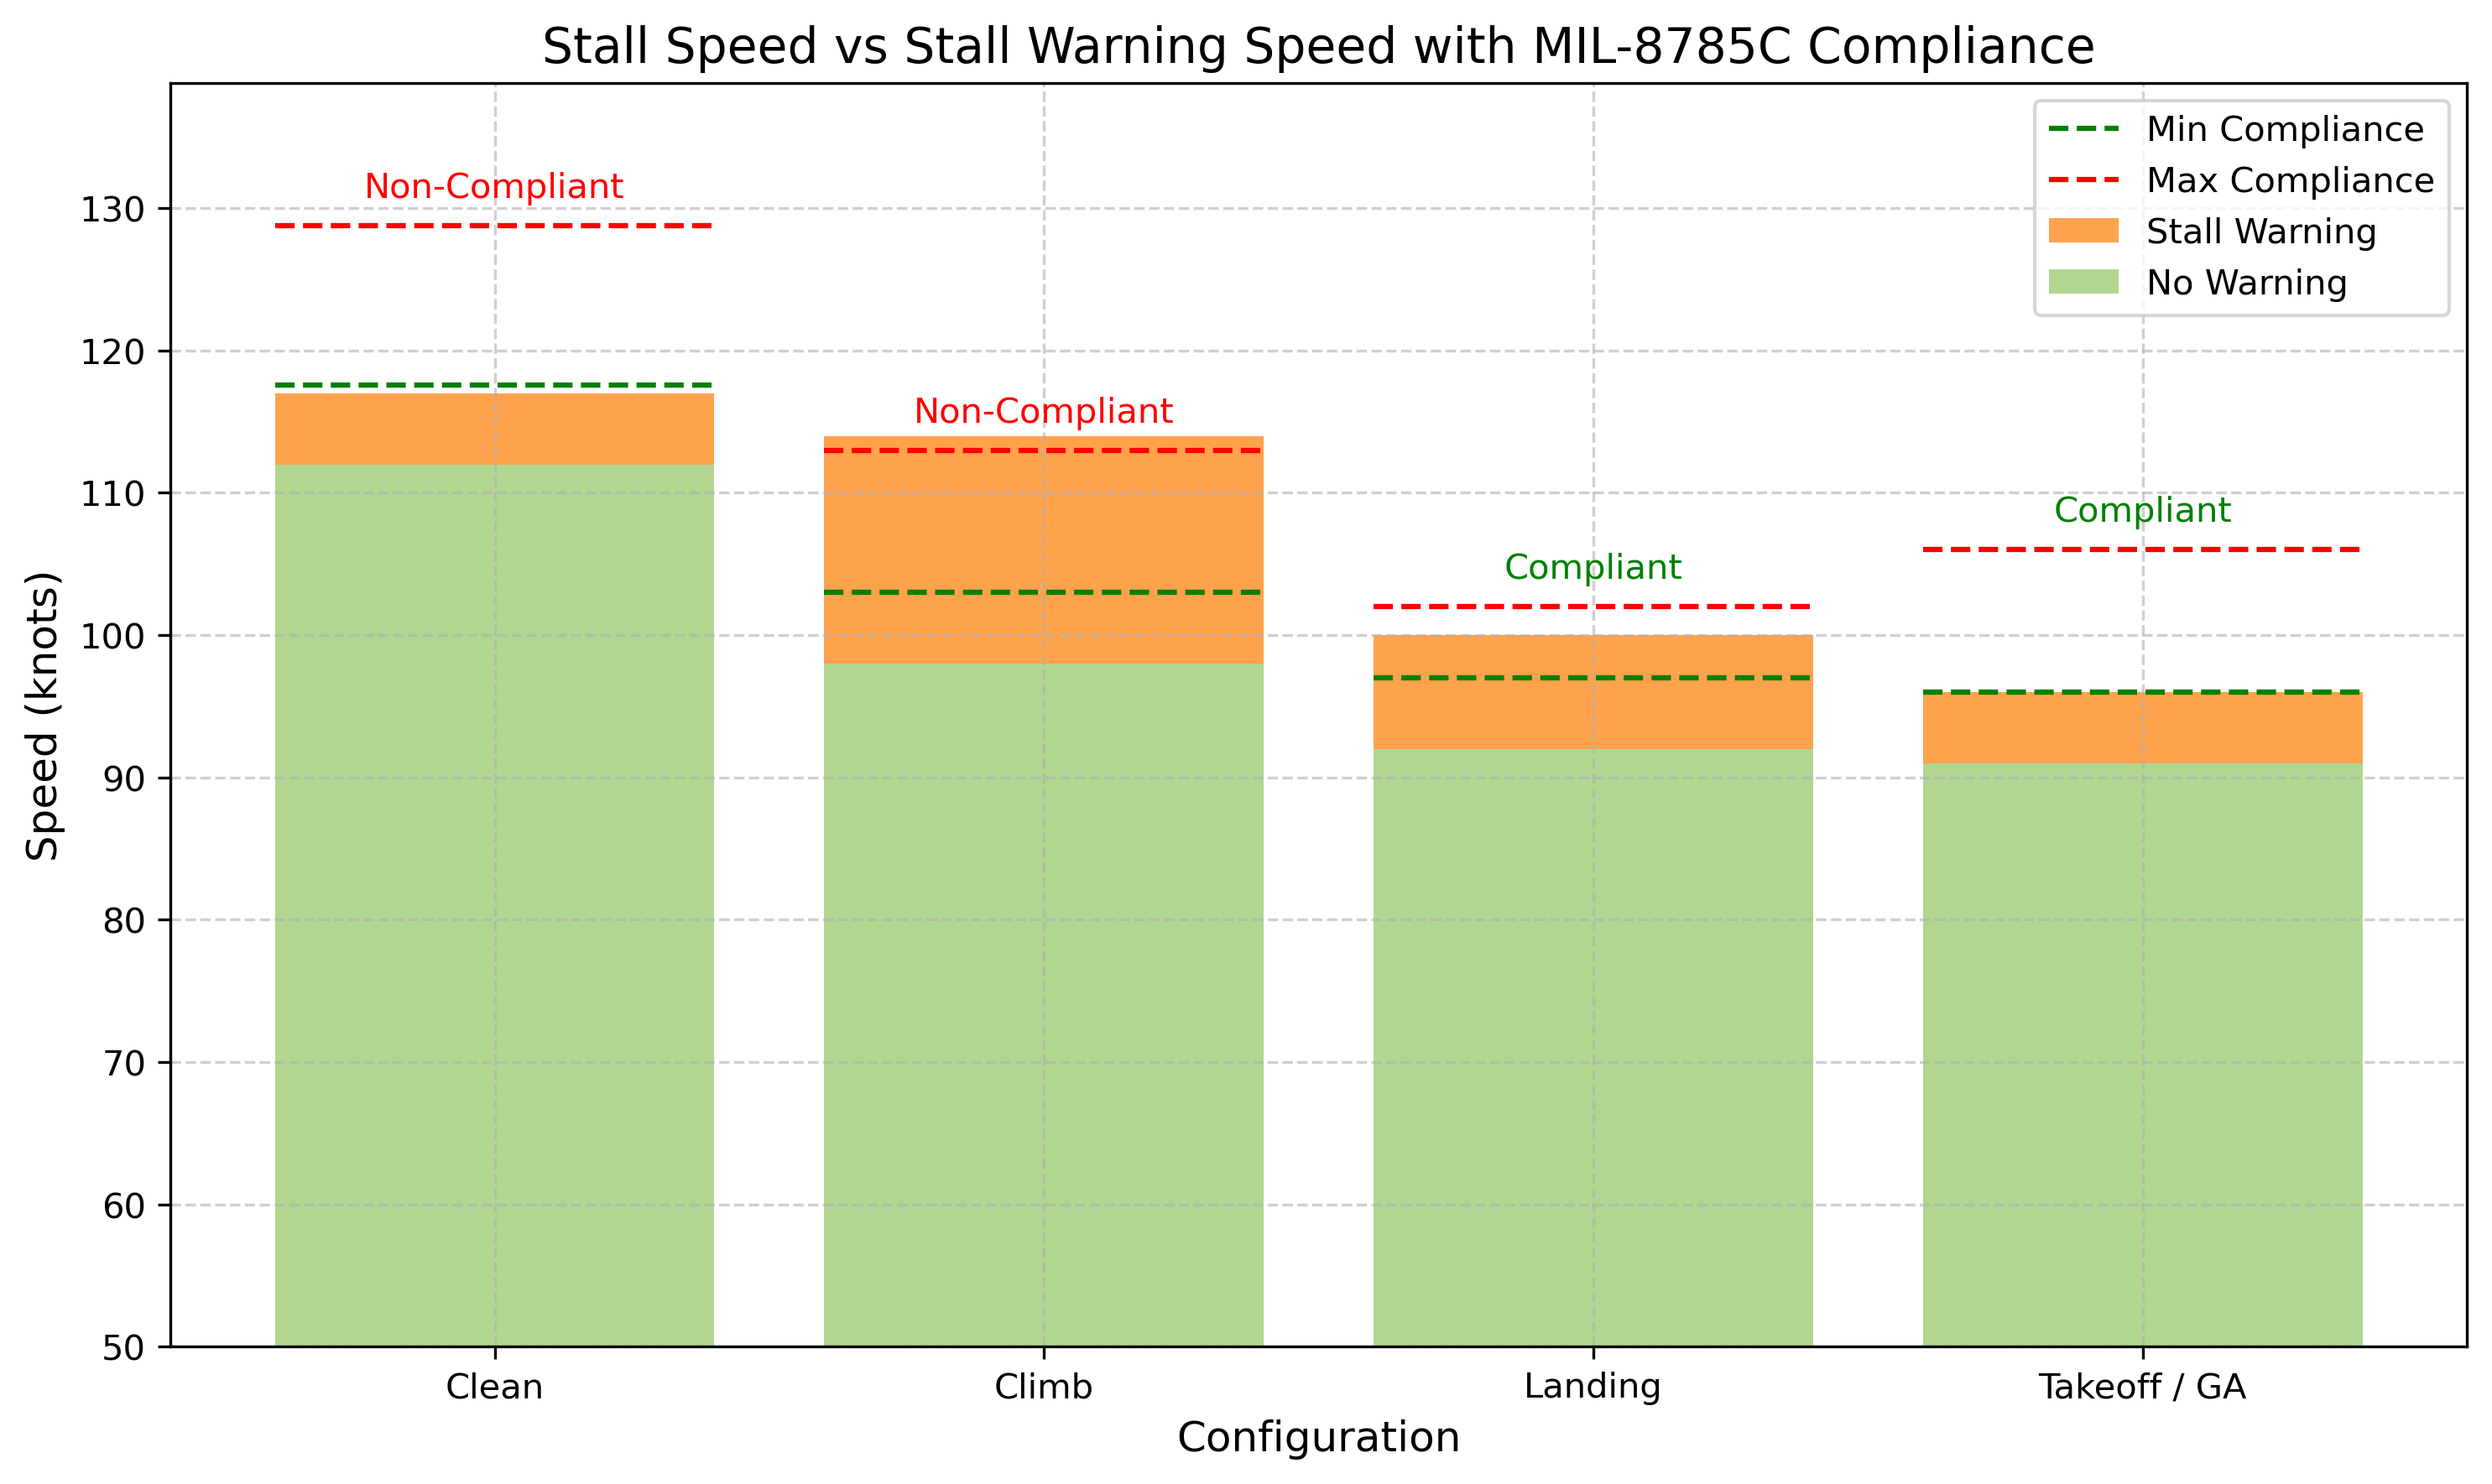

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for configurations
configurations = ["Clean", "Climb", "Landing", "Takeoff / GA"]
stall_speeds = [112, 98, 92, 91]  # Stall speeds (in knots)
stall_warning_speeds = [117, 114, 100, 96]  # Stall warning speeds (in knots)

# Compliance limit calculations
min_warning_speeds = [max(stall * 1.05, stall + 5) for stall in stall_speeds]  # Min: Higher of 1.05*stall or stall + 5 knots
max_warning_speeds = []

# Adjust max compliance limits for "approach" configurations
for config, stall in zip(configurations, stall_speeds):
    if config == "Landing":  # Adjust for approach configurations
        max_warning_speeds.append(max(stall * 1.10, stall + 10))
    else:
        max_warning_speeds.append(max(stall * 1.15, stall + 15))

# Calculate compliance status
compliance_status = []
for stall_warn, min_warn, max_warn in zip(stall_warning_speeds, min_warning_speeds, max_warning_speeds):
    if min_warn <= stall_warn <= max_warn:
        compliance_status.append("Compliant")
    else:
        compliance_status.append("Non-Compliant")

# Create a DataFrame for Excel export
data = {
    "Configuration": configurations,
    "Stall Speed (knots)": stall_speeds,
    "Stall Warning Speed (knots)": stall_warning_speeds,
    "Min Warning Speed (knots)": min_warning_speeds,
    "Max Warning Speed (knots)": max_warning_speeds,
    "Compliance Status": compliance_status,
}

df = pd.DataFrame(data)

# Export to Excel
output_file = "./output/stall_speeds_compliance.xlsx"
df.to_excel(output_file, index=False)

print(f"Data exported to {output_file}")

# Plotting Code (unchanged)
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Plot stall warning speeds with specified color
ax.bar(configurations, stall_warning_speeds, color="#FFA24C", label="Stall Warning")

# Plot stall speeds with specified color
ax.bar(configurations, stall_speeds, color="#B1D690", label="No Warning")

# Add compliance bands
for i, config in enumerate(configurations):
    ax.plot(
        [i - 0.4, i + 0.4],
        [min_warning_speeds[i], min_warning_speeds[i]],
        "g--",
        label="Min Compliance" if i == 0 else "",
    )
    ax.plot(
        [i - 0.4, i + 0.4],
        [max_warning_speeds[i], max_warning_speeds[i]],
        "r--",
        label="Max Compliance" if i == 0 else "",
    )

# Annotate compliance status above the red dashed line
for i, (stall_warn, min_warn, max_warn) in enumerate(
    zip(stall_warning_speeds, min_warning_speeds, max_warning_speeds)
):
    if min_warn <= stall_warn <= max_warn:
        status = "Compliant"
        color = "green"
    else:
        status = "Non-Compliant"
        color = "red"
    ax.text(i, max_warn + 2, status, ha="center", color=color, fontsize=10)  # Position above the max compliance line

# Customize plot
ax.set_title(
    "Stall Speed vs Stall Warning Speed with MIL-8785C Compliance", fontsize=14
)
ax.set_ylabel("Speed (knots)", fontsize=12)
ax.set_ylim(50, max(max_warning_speeds) + 10)
ax.set_xlabel("Configuration", fontsize=12)
ax.set_xticks(range(len(configurations)))
ax.set_xticklabels(configurations, fontsize=10)
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.savefig("./output/plots/stall_speeds.png")
plt.show()
